## Predicting Loan Default

In [2]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
## import and  read file 
df = pd.read_excel("DATASET/Default_Fin.xlsx")
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
# Check the data types of each column
data_types = df.dtypes

data_types


Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

In [5]:
# drop the index column
df.drop(columns='Index', inplace=True)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [6]:
# Rename Defaulted? as Defaulted
df.rename(columns={'Defaulted?': 'Defaulted'}, inplace=True)
df.head()                    

,Employed,Bank Balance,Annual Salary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [7]:
# Check Unique Values
df['Employed'].value_counts()



1    7056
0    2944
Name: Employed, dtype: int64

In [8]:
# write a code for the Employed to have 0 = unemployed, 1 = employed
def employ_status(x):
    if x == 1:
        return 'Employed'
    else:
        return 'Unemployed'
df['Employed'] = df['Employed'].apply(employ_status)
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted
0,Employed,8754.36,532339.56,0
1,Unemployed,9806.16,145273.56,0
2,Employed,12882.60,381205.68,0
3,Employed,6351.00,428453.88,0
4,Employed,9427.92,461562.00,0


In [9]:
# Summary statistics of the data
df.describe().astype('int')

,Bank Balance,Annual Salary,Defaulted
count,10000,10000,10000
mean,10024,402203,0
std,5804,160039,0
min,0,9263,0
25%,5780,256085,0
50%,9883,414631,0
75%,13995,525692,0
max,31851,882650,1


In [10]:
# Check for negative value
df[df[['Bank Balance', 'Annual Salary']]< 0 ].sum()


Employed           0
Bank Balance     0.0
Annual Salary    0.0
Defaulted        0.0
dtype: object

In [11]:
# check for duplicate 
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

#### Univariates Analysis

In [12]:
df.columns.tolist()

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

In [13]:
# Distribution of Employed
dist_employ = df['Employed'].value_counts()
dist_employ

Employed      7056
Unemployed    2944
Name: Employed, dtype: int64

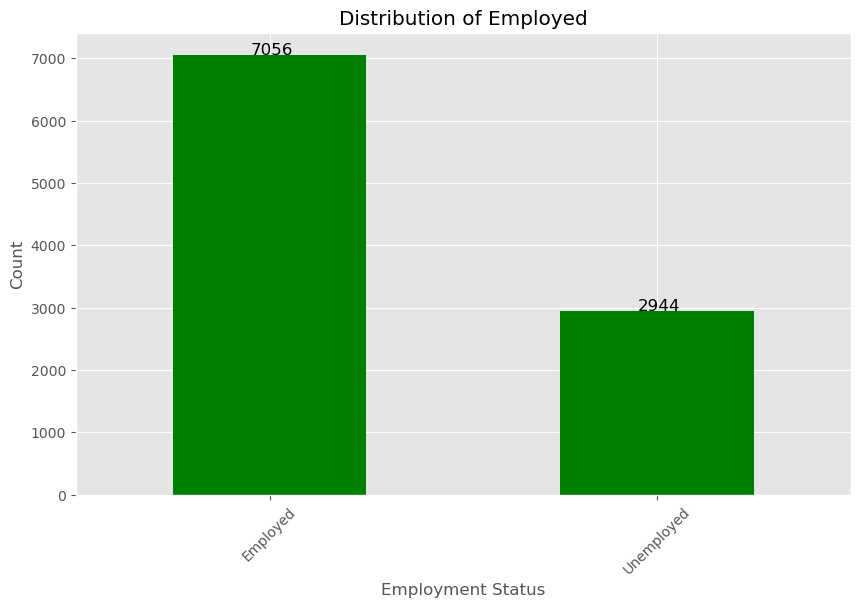

In [14]:
# Distribution of Employed
plt.figure(figsize=(10, 6))
ax = dist_employ.plot(kind='bar', color='green')
ax.set_title('Distribution of Employed')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_xticklabels(dist_employ.index, rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')
plt.show()

- It shows that 7056 employees, and 2944 unemployed 

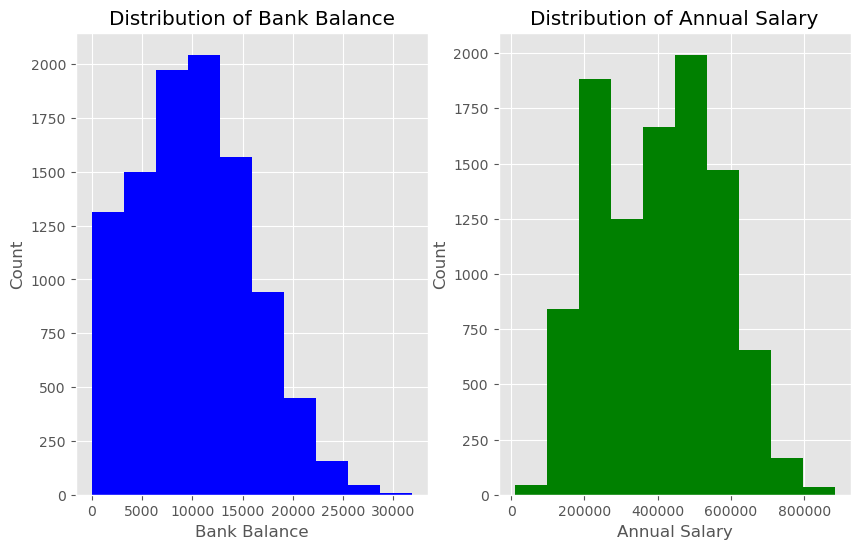

In [15]:
# Create subplots for the distribution of Bank Balance, and Annual Salary
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Customize subplot 1 - Bank Balance
axs[0].hist(df['Bank Balance'], bins=10, color='blue')
axs[0].set_title('Distribution of Bank Balance')
axs[0].set_xlabel('Bank Balance')
axs[0].set_ylabel('Count')

# Customize subplot 2 - Annual Salary
axs[1].hist(df['Annual Salary'], bins=10, color='green')
axs[1].set_title('Distribution of Annual Salary')
axs[1].set_xlabel('Annual Salary')
axs[1].set_ylabel('Count')

# Display the plot
plt.show()

- It shows that The distribution appears to be slightly right-skewed, most employees have account balances between 5000 and 10,000 while their annual earning salary reached 500,000.

In [16]:
# Distribution for the Defaulted 
dist_default = df['Defaulted'].value_counts()
dist_default

0    9667
1     333
Name: Defaulted, dtype: int64

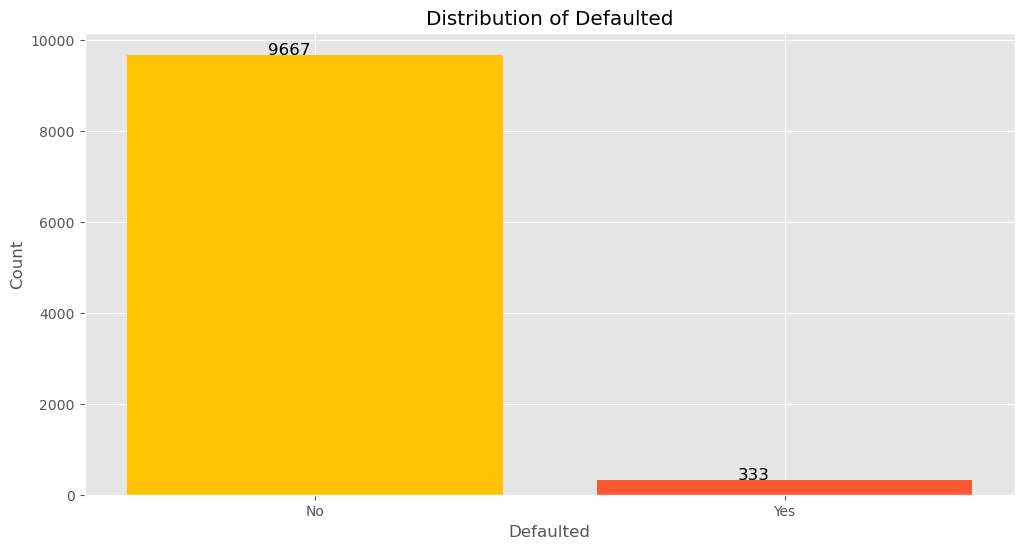

In [17]:
# Customize the chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(dist_default.index, dist_default.values, color=['#FFC300', '#FF5733'])
ax.set_title('Distribution of Defaulted')
ax.set_xlabel('Defaulted')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')

# Display the plot
plt.show()

- The charts  show most employees of about 9667 will not default in loan payment while 333 employees shows tenddency to default loan payment

#  Bivariates Analysis

In [18]:
df.columns.tolist()

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted']

In [19]:
## Bank Balance by employed
bank_employ = df.groupby('Employed')['Bank Balance'].mean().round()
bank_employ

Employed
Employed       9261.0
Unemployed    11854.0
Name: Bank Balance, dtype: float64

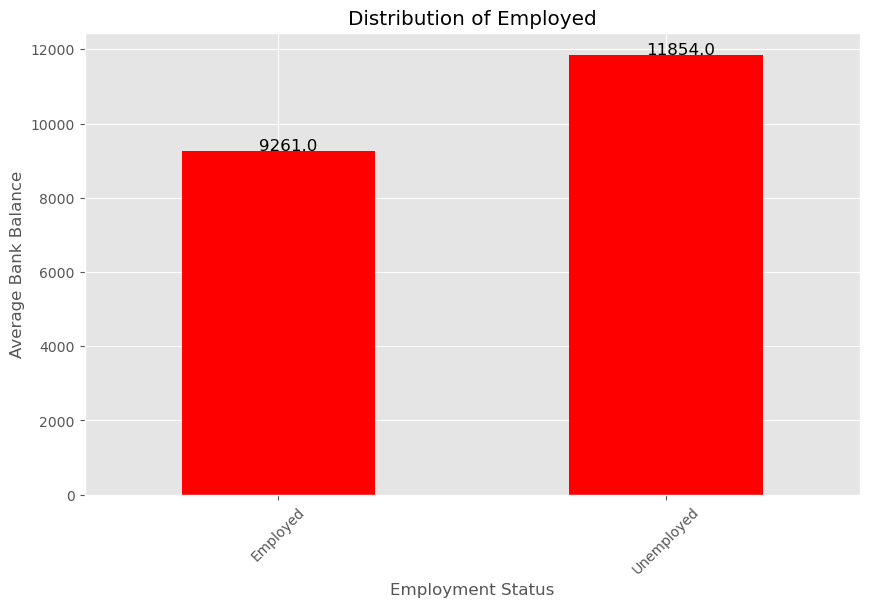

In [20]:
# Distribution of Employed By Bank Balance
plt.figure(figsize=(10, 6))
ax = bank_employ.plot(kind='bar', color='red')
ax.set_title('Distribution of Employed')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Average Bank Balance')
ax.set_xticklabels(dist_employ.index, rotation=45)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+5, str(i.get_height()), fontsize=12, color='black')
plt.show()

- The unemployed have more bank balance,  on average of 11854 compared to the employed workers with an average of 9261

In [21]:
## Annual salary by employee
Annual_employ = df.groupby('Employed')['Annual Salary'].mean().round()
Annual_employ

Employed
Employed      480143.0
Unemployed    215403.0
Name: Annual Salary, dtype: float64

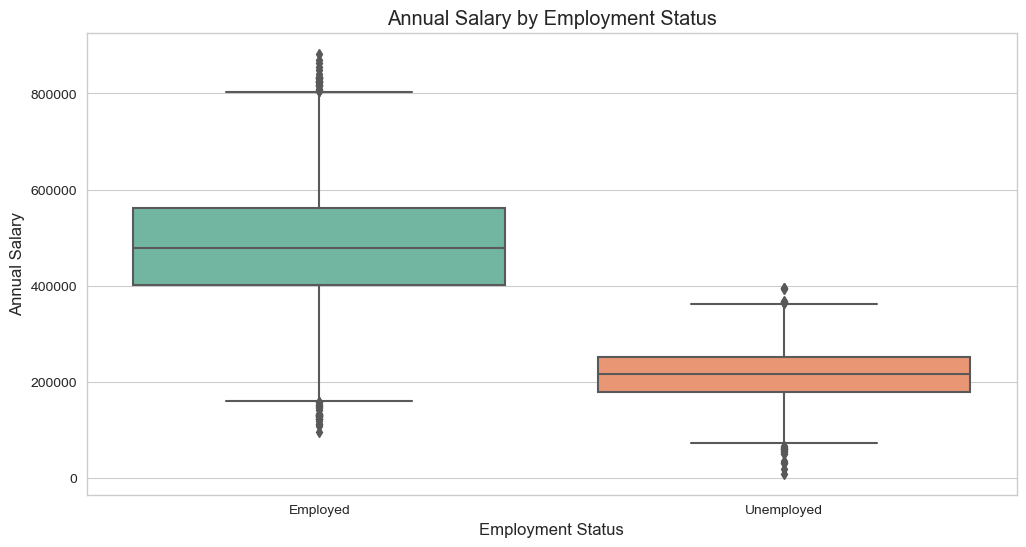

In [22]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employed', y='Annual Salary', data=df, palette='Set2')
plt.title('Annual Salary by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()

- Seventy-five percent of the employees in  earn a salary of over 500,000, while the remaining 25 percent earn less than 500,000. The minimum salary  is below 200,000, and the maximum salary is 800,000. Seventy-five percent of unemployed individuals have an annual income slightly above 200,000, while 25 percent have an income slightly below 200,000. The maximum annual income is above 300,000.

In [23]:
## Annual salary by Default
Annual_Defaulted = df.groupby('Defaulted')['Annual Salary'].describe().astype('int')
Annual_Defaulted

,count,mean,std,min,25%,50%,75%,max
Defaulted,,,,,,,,
0,9667,402793,159819,9263,256860,415073,525885,882650
1,333,385069,165650,115965,228330,378184,516807,797597


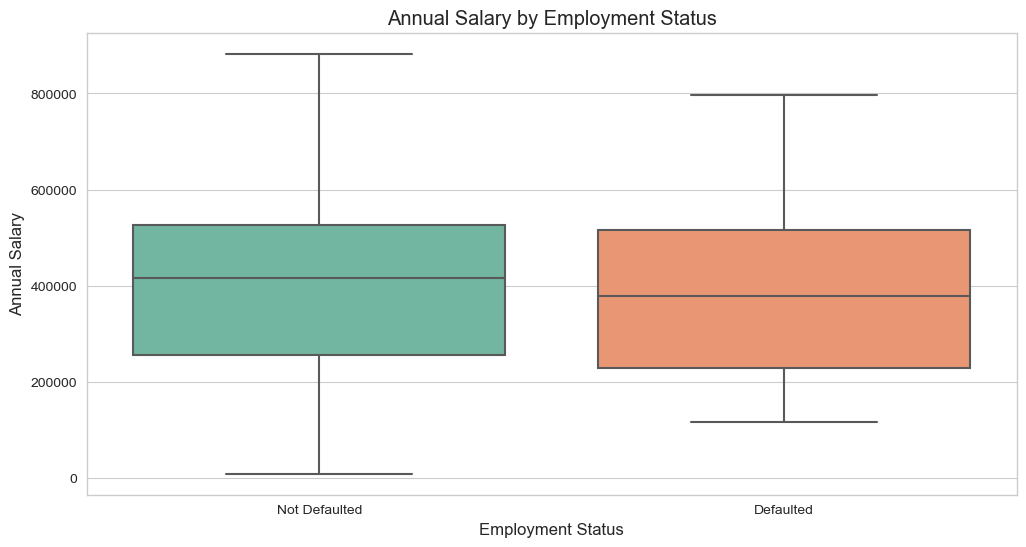

In [24]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defaulted', y='Annual Salary', data=df, palette='Set2')
# Add legend to the x-axis
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'])


plt.title('Annual Salary by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Annual Salary')

# Display the plot
plt.show()

- Seventy-five percent of non-defaulted individuals earn 525,885, while the remaining 25 percent earns 256,860. The maximum salary for non-defaulted individuals is 882,650. For defaulted individuals, 75 percent earn 516,808, while the remaining 25 percent earn 228,330. The maximum salary earned by defaulted individuals is 797,597.

In [25]:
## Bank Balance by Defaulted
df.groupby('Defaulted')['Bank Balance'].describe().astype('int')


,count,mean,std,min,25%,50%,75%,max
Defaulted,,,,,,,,
0,9667,9647,5477,0,5588,9634,13539,28692
1,333,20973,4095,7828,18139,21469,23866,31851


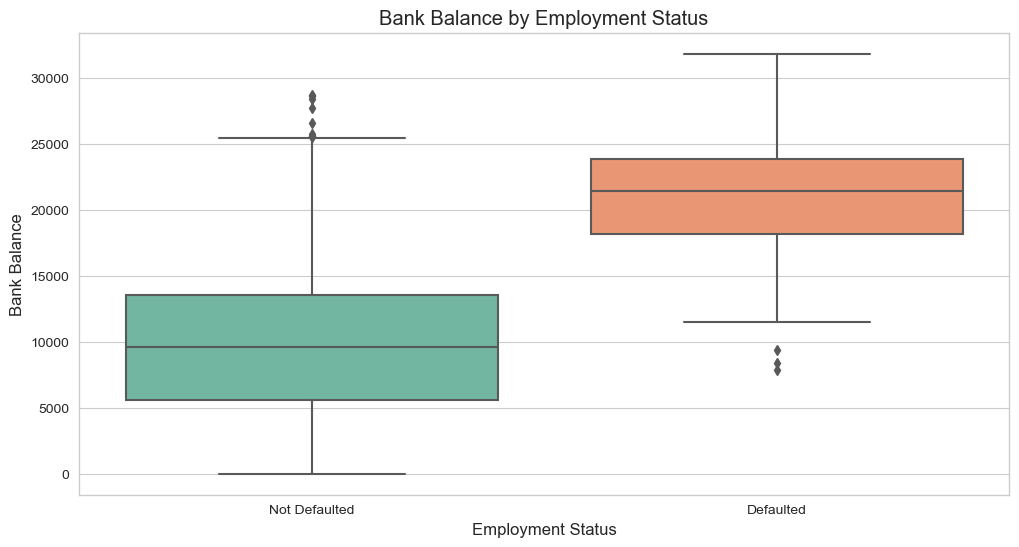

In [26]:
# Create a boxplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Defaulted', y='Bank Balance', data=df, palette='Set2')
# Add legend to the x-axis
plt.xticks(ticks=[0, 1], labels=['Not Defaulted', 'Defaulted'])


plt.title('Bank Balance by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Bank Balance')

# Display the plot
plt.show()

- 75%  of the not defaulted employees have 13539 in their bank balance, while 25% of them have 5588 and the max account balance for non defaulted is 28692. 75% Defaulted have 23866 in their bank balance while 25% defaulted have 18139 in their bank balance and the min bank balnace for defaulted is 7228

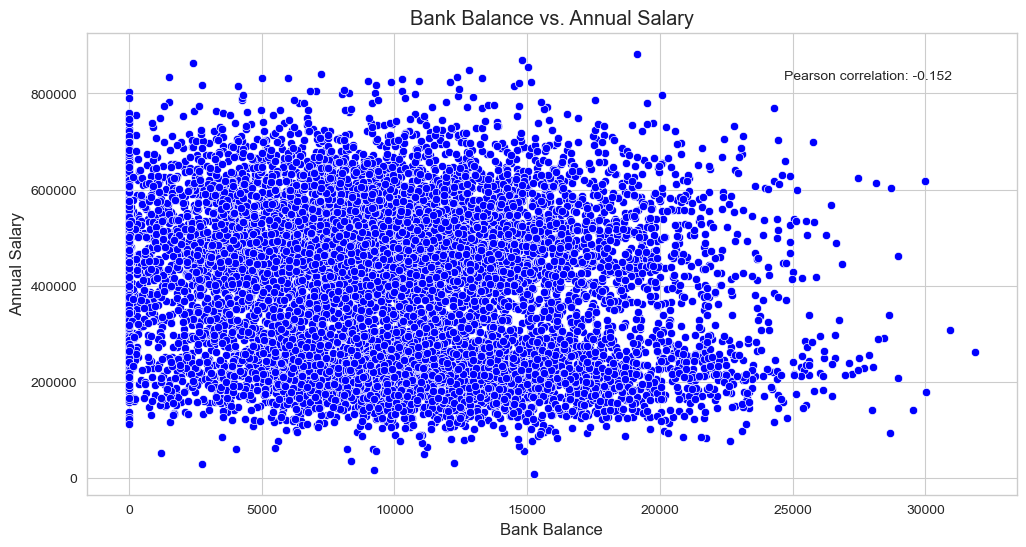

In [27]:
# Correlation between Bank Balance and Annual Salary
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Bank Balance', y='Annual Salary', data=df, color='blue')

plt.title('Bank Balance vs. Annual Salary')
plt.xlabel('Bank Balance')
plt.ylabel('Annual Salary')

# Add Pearson correlation to the plot
corr = df['Bank Balance'].corr(df['Annual Salary'])
plt.text(0.75, 0.9, f'Pearson correlation: {corr:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()




- It shows a slight negative correlation between the two independent variable, with a correlation coefficient of -0.152, which means that as Annual Salary increases the Bank Balance reduces

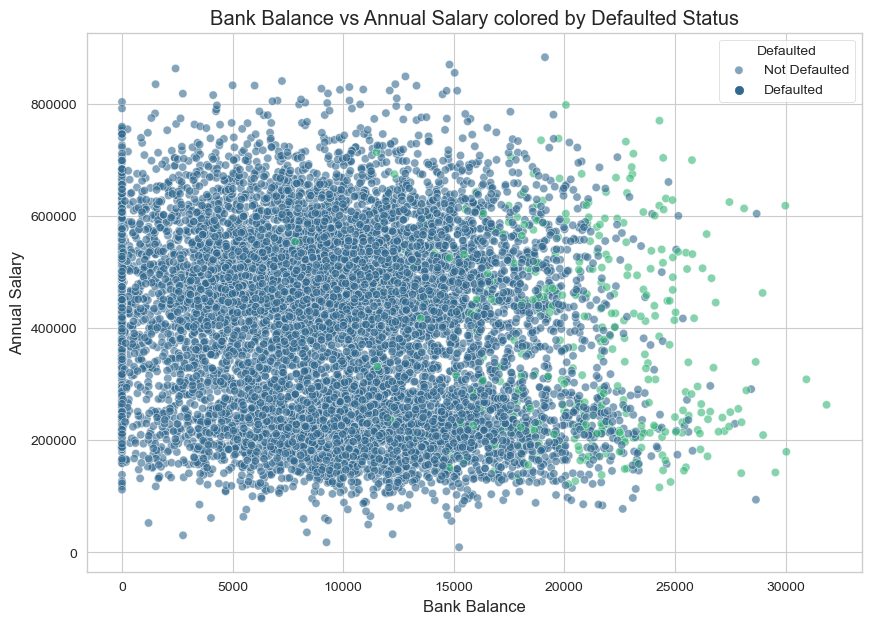

In [28]:
# Scatter plot of 'Bank Balance' vs 'Annual Salary', colored by 'Defaulted'
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df["Bank Balance"], y=df["Annual Salary"], hue=df["Defaulted"], palette="viridis", alpha=0.6)
plt.title("Bank Balance vs Annual Salary colored by Defaulted Status")
plt.legend(title="Defaulted", labels=["Not Defaulted", "Defaulted"])
plt.show()

- The data points are densely clustered in areas with lower bank balances and annual salaries, where defaults are more prevalent. As both bank balances and annual salaries rise, the probability of defaulting appears to diminish, evident from the reduced number of orange points in the upper-right section of the graph.

**Next steps to Achieve the Objectives.**

To predict the likelihood that an employee will default on a loan using the above variables, you can use a binary classification model. You can train the model on historical data where you know the loan default status of each employee, and then use the model to predict the loan default status of new employees based on their features.

Some popular binary classification algorithms include logistic regression, decision trees, random forests, and support vector machines (SVMs). You can compare the performance of these algorithms on your data to select the best one for your problem.

To visualize the performance of the model, you can use a confusion matrix, ROC curve, and precision-recall curve. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. The ROC curve plots the true positive rate against the false positive rate at different classification thresholds, and the AUC score measures the overall performance of the model. The precision-recall curve plots the precision against the recall at different classification thresholds, and the F1 score measures the overall performance of the model.

Another useful visualization technique is to plot the decision boundary of the model in a 2D or 3D feature space. This can help you understand how the model is making predictions based on the different features.

Overall, the perfect technique for visualizing the performance of a binary classification model depends on the specific problem and dataset. You can try different techniques and select the ones that are most informative and easy to interpret for your particular problem.

## Convert Categorical Column to Numerical
- One-Hot Encoding
- Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Employed' column
df['Employed'] = le.fit_transform(df['Employed'])

# Print the first two rows of the 'Employed' column
print(df['Employed'].head(2))

0    0
1    1
Name: Employed, dtype: int32


## Feature Selection
- Select the target of the dataset, y = defaulted
- Select the independent variable, X

In [30]:
# select the target of the dataset, y
y = df['Defaulted']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted, dtype: int64

In [31]:
# select the independent variables, X
X = df.drop(columns = 'Defaulted', axis = 1)
X.head()

,Employed,Bank Balance,Annual Salary
0,0,8754.36,532339.56
1,1,9806.16,145273.56
2,0,12882.60,381205.68
3,0,6351.00,428453.88
4,0,9427.92,461562.00


## Model Selection
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbor Classifier
- Support Vector Machines

## Train-Test-Split
We are splitting the X and y into training set and testing using 70-30 ratio.

In [32]:
# import the train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


       Employed  Bank Balance  Annual Salary
746          1       9829.20      191495.28
3688         0       5614.32      519704.40

       Employed  Bank Balance  Annual Salary
7288         1      14184.00      217233.96
6310         0      10126.92      287478.24

 746     0
3688    0
Name: Defaulted, dtype: int64

 7288    0
6310    0
Name: Defaulted, dtype: int64


In [33]:
print('\n The Shape of X_train', X_train.shape)
print('\n The Shape of X_test', X_test.shape)
print('\n The Shape of y_train', y_train.shape)
print('\n The Shape of y_test', y_test.shape)


 The Shape of X_train (7000, 3)

 The Shape of X_test (3000, 3)

 The Shape of y_train (7000,)

 The Shape of y_test (3000,)


## Data Scaling (Standardization)
It is also called data standardization: it is a preprocessing step towards transforming the features of the data to have a similar scale. It is important because may machine learning algorithms perform better or converge faster when the features are on a similar scale.

**Methods of Scaling:**
- Min-Max Scaling
- Standard Scaler.

In [34]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()
# fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## **Model Training**
- Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = lr_model.predict(X_test_scaled)

# print the accuracy score for logistic regression
print(f'The accuracy score for logistic regression is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for logistic regression is 97.2%


**Decision Tree Classifier**


In [37]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier()
dc_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [38]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = dc_model.predict(X_test_scaled)

# print the accuracy score for decision tree classifier
print(f'The accuracy score for decision tree is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for decision tree is 96.1%


**Random Forest Classifier**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [40]:

from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = rf_model.predict(X_test_scaled)

# print the accuracy score for random forest classifier
print(f'The accuracy score for random forest is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for random forest is 96.7%


**K-Nearest Neighour**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [42]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = knn_model.predict(X_test_scaled)

# print the accuracy score KNearest Neighbor classifier
print(f'The accuracy score for KNearest Neighbor is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for KNearest Neighbor is 96.8%


In [43]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [44]:
from sklearn.metrics import accuracy_score

# fit the model on X_test_scaled
y_pred = svm_model.predict(X_test_scaled)

# print the accuracy score for Support Vector Machines
print(f'The accuracy score for Support Vector is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy score for Support Vector is 97.2%


**Model Evaluation**

There are various techniques for evaluating the performance of a model.They include: 
- Accuracy,Precision, Recall, and F1-score(Classification Report)
- Confusion Matrix
- AuC-Roc score and curve

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.977     0.994     0.986      2900
    Defaulted      0.660     0.330     0.440       100

     accuracy                          0.972      3000
    macro avg      0.819     0.662     0.713      3000
 weighted avg      0.967     0.972     0.967      3000



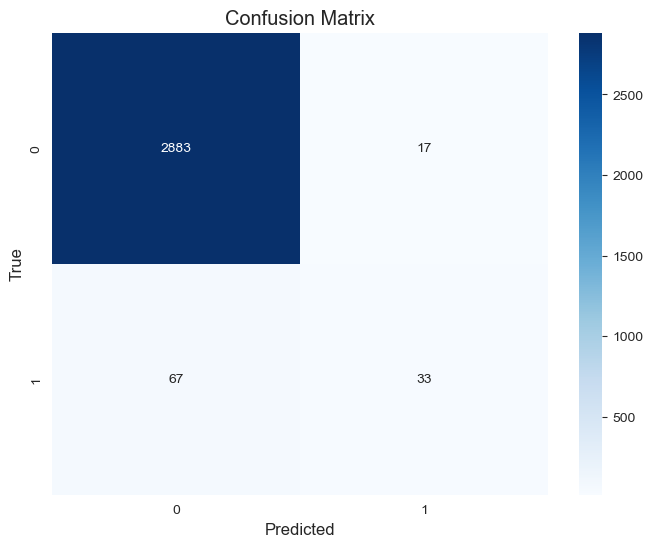

Decision Tree Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.981     0.979     0.980      2900
    Defaulted      0.423     0.440     0.431       100

     accuracy                          0.961      3000
    macro avg      0.702     0.710     0.706      3000
 weighted avg      0.962     0.961     0.962      3000



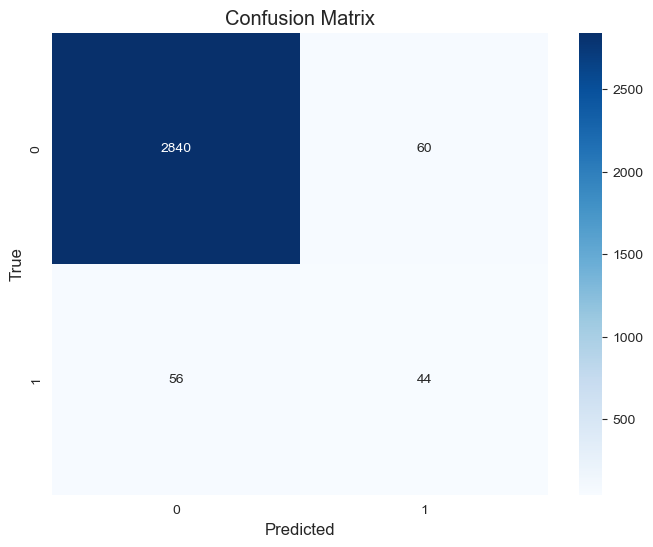

Random Forest Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.977     0.989     0.983      2900
    Defaulted      0.500     0.320     0.390       100

     accuracy                          0.967      3000
    macro avg      0.738     0.654     0.687      3000
 weighted avg      0.961     0.967     0.963      3000



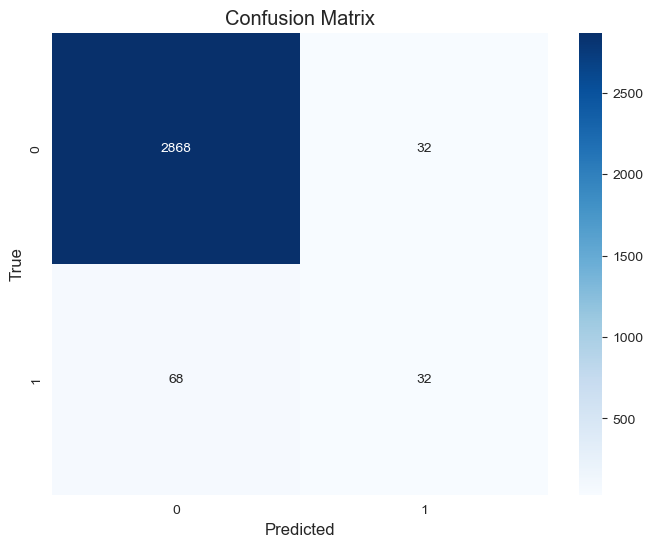

SVM Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.974     0.997     0.986      2900
    Defaulted      0.727     0.240     0.361       100

     accuracy                          0.972      3000
    macro avg      0.851     0.618     0.673      3000
 weighted avg      0.966     0.972     0.965      3000



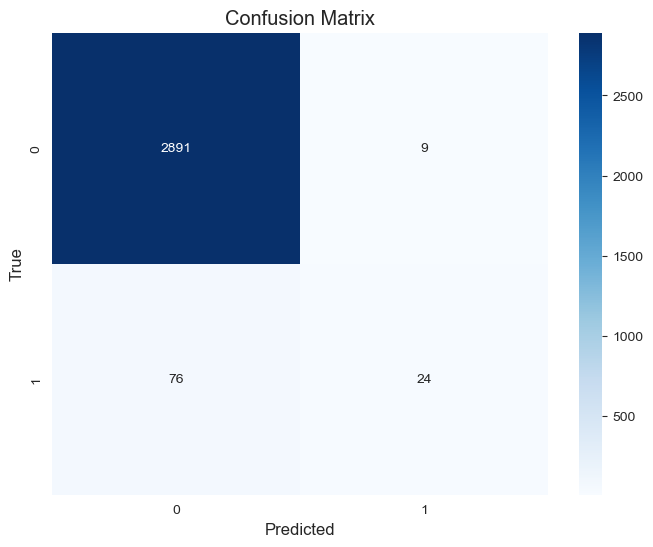

KNN Classification Report: 
               precision    recall  f1-score   support

Not-Defaulted      0.977     0.990     0.984      2900
    Defaulted      0.533     0.320     0.400       100

     accuracy                          0.968      3000
    macro avg      0.755     0.655     0.692      3000
 weighted avg      0.962     0.968     0.964      3000



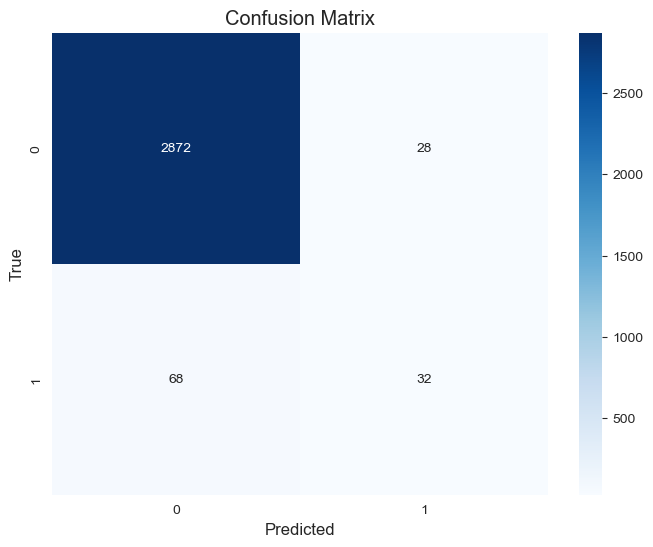

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# create a list of models
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

models = [lr_model, dc_model, rf_model, svm_model, knn_model]

# set the decimal places of the values
decimal_places = 3

# set the report labels
labels = ['Not-Defaulted', 'Defaulted']

def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels = labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# we can call the function to plot the confusion matrix in the loop:
for i, model in enumerate(models):
    # predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)

    # generate the classification report
    report = classification_report(y_test, y_pred, target_names = labels, digits = decimal_places)
    print(f'{model_names[i]} Classification Report: \n{report}')

    # plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

### Sumarry of Evaluation Metrics
*It seen that Logistic Regression has a higher F1-Score of 0.44 compared to the other models with a precision of 0.66 and a recall of 0.33. This is able to provide the balance between the loan defaulted(recall) and minimizing false positive(precision) while maintaining a higher accuracy score of 97.2%*